# **Student Mental Health Prediction - Daniel Varvello**

In [2]:
##Data set link: https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/data

##The goal of this project is to use a decision tree classifier model to predict student depression based on known variables

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

#### *Set Options*

In [4]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 40)

## **Data Ingestion**

In [5]:
##Importing Data

df = pd.read_csv('/Users/danielvarvello/Downloads/student_depression_dataset.csv')

### **Initial Data Inspection**

In [6]:

df.head(10)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,'Less than 5 hours',Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,'7-8 hours',Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,'Less than 5 hours',Unhealthy,'Class 12',No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,'7-8 hours',Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,'Less than 5 hours',Moderate,LLB,Yes,2.0,5.0,No,1


In [7]:
df.tail(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1
27900,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,'Less than 5 hours',Healthy,BCA,Yes,2.0,3.0,Yes,1


In [8]:
df.shape

(27901, 18)

In [9]:
df.info

<bound method DataFrame.info of            id  Gender   Age           City Profession  Academic Pressure  \
0           2    Male  33.0  Visakhapatnam    Student                5.0   
1           8  Female  24.0      Bangalore    Student                2.0   
2          26    Male  31.0       Srinagar    Student                3.0   
3          30  Female  28.0       Varanasi    Student                3.0   
4          32  Female  25.0         Jaipur    Student                4.0   
...       ...     ...   ...            ...        ...                ...   
27896  140685  Female  27.0          Surat    Student                5.0   
27897  140686    Male  27.0       Ludhiana    Student                2.0   
27898  140689    Male  31.0      Faridabad    Student                3.0   
27899  140690  Female  18.0       Ludhiana    Student                5.0   
27900  140699    Male  27.0          Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Sat

The dataset consists of student mental health survey responses collected to study the relationship between psychological well-being, academic stress, and lifestyle habits. Each row represents an individual student, with features capturing their emotional state, academic environment, personal background, and behavioral patterns.


#### ***Select Features By Type***

In [10]:
df.select_dtypes(include='number')

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
0,2,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1
1,8,24.0,2.0,0.0,5.90,5.0,0.0,3.0,0
2,26,31.0,3.0,0.0,7.03,5.0,0.0,9.0,0
3,30,28.0,3.0,0.0,5.59,2.0,0.0,4.0,1
4,32,25.0,4.0,0.0,8.13,3.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,5.0,0.0,5.75,5.0,0.0,7.0,0
27897,140686,27.0,2.0,0.0,9.40,3.0,0.0,0.0,0
27898,140689,31.0,3.0,0.0,6.61,4.0,0.0,12.0,0
27899,140690,18.0,5.0,0.0,6.88,2.0,0.0,10.0,1


In [11]:
df.select_dtypes(include='object')

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Financial Stress,Family History of Mental Illness
0,Male,Visakhapatnam,Student,'5-6 hours',Healthy,B.Pharm,Yes,1.0,No
1,Female,Bangalore,Student,'5-6 hours',Moderate,BSc,No,2.0,Yes
2,Male,Srinagar,Student,'Less than 5 hours',Healthy,BA,No,1.0,Yes
3,Female,Varanasi,Student,'7-8 hours',Moderate,BCA,Yes,5.0,Yes
4,Female,Jaipur,Student,'5-6 hours',Moderate,M.Tech,Yes,1.0,No
...,...,...,...,...,...,...,...,...,...
27896,Female,Surat,Student,'5-6 hours',Unhealthy,'Class 12',Yes,1.0,Yes
27897,Male,Ludhiana,Student,'Less than 5 hours',Healthy,MSc,No,3.0,Yes
27898,Male,Faridabad,Student,'5-6 hours',Unhealthy,MD,No,2.0,No
27899,Female,Ludhiana,Student,'Less than 5 hours',Healthy,'Class 12',Yes,5.0,No


#### Editing Column Values/Names

In [12]:
## Changing 'Financial Stress' to a numerical value

df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')

In [13]:
##Renaming Column

df.rename(columns={'Have you ever had suicidal thoughts ?': 'Suicidal Thoughts'}, inplace=True)

In [14]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree', 'Suicidal Thoughts',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

#### ***Missing Values***

In [15]:
df.isna().sum()

id                                  0
Gender                              0
Age                                 0
City                                0
Profession                          0
Academic Pressure                   0
Work Pressure                       0
CGPA                                0
Study Satisfaction                  0
Job Satisfaction                    0
Sleep Duration                      0
Dietary Habits                      0
Degree                              0
Suicidal Thoughts                   0
Work/Study Hours                    0
Financial Stress                    3
Family History of Mental Illness    0
Depression                          0
dtype: int64

#### ***Drop Uneeded Columns***

In [16]:
## id is unneeded, profession is unneeded since all participants are "students"
## Work Profession/ Job Satisfaction is unneeded; they're all unemployed

df = df.drop(['id', 'Profession', 'Work Pressure', 'Job Satisfaction'], axis=1)

In [17]:
df

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,5.0,5.75,5.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,Male,27.0,Ludhiana,2.0,9.40,3.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,Faridabad,3.0,6.61,4.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,Female,18.0,Ludhiana,5.0,6.88,2.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


## **Exploratory Analysis**

In [18]:
##Summary Statistics

df.describe()

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,25.822300,3.141214,7.656104,2.943837,7.156984,3.139867,0.585499
std,4.905687,1.381465,1.470707,1.361148,3.707642,1.437347,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,6.290000,2.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,7.770000,3.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,8.920000,4.000000,10.000000,4.000000,1.000000
max,59.000000,5.000000,10.000000,5.000000,12.000000,5.000000,1.000000


In [19]:
df.describe(include= 'object')

,Gender,City,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Family History of Mental Illness
count,27901,27901,27901,27901,27901,27901,27901
unique,2,52,5,4,28,2,2
top,Male,Kalyan,'Less than 5 hours',Unhealthy,'Class 12',Yes,No
freq,15547,1570,8310,10317,6080,17656,14398


In [20]:
df.describe(percentiles=[0.01,0.05,0.10,0.9, 0.99,0.995])

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,25.822300,3.141214,7.656104,2.943837,7.156984,3.139867,0.585499
std,4.905687,1.381465,1.470707,1.361148,3.707642,1.437347,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1%,18.000000,1.000000,5.110000,1.000000,0.000000,1.000000,0.000000
5%,18.000000,1.000000,5.380000,1.000000,0.000000,1.000000,0.000000
10%,19.000000,1.000000,5.640000,1.000000,1.000000,1.000000,0.000000
50%,25.000000,3.000000,7.770000,3.000000,8.000000,3.000000,1.000000
90%,33.000000,5.000000,9.690000,5.000000,12.000000,5.000000,1.000000
99%,34.000000,5.000000,9.960000,5.000000,12.000000,5.000000,1.000000


### **Correlation Analysis**

In [21]:
df.corr(numeric_only=True).abs()

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
Age,1.000000,0.075803,0.005056,0.009235,0.032928,0.095026,0.226422
Academic Pressure,0.075803,1.000000,0.022239,0.110988,0.095970,0.151706,0.474835
CGPA,0.005056,0.022239,1.000000,0.044062,0.002604,0.005885,0.022210
Study Satisfaction,0.009235,0.110988,0.044062,1.000000,0.036441,0.065107,0.167971
Work/Study Hours,0.032928,0.095970,0.002604,0.036441,1.000000,0.075283,0.208563
Financial Stress,0.095026,0.151706,0.005885,0.065107,0.075283,1.000000,0.363591
Depression,0.226422,0.474835,0.022210,0.167971,0.208563,0.363591,1.000000


In [22]:
sns.set(rc={'figure.figsize':(15,8)})

<Axes: >

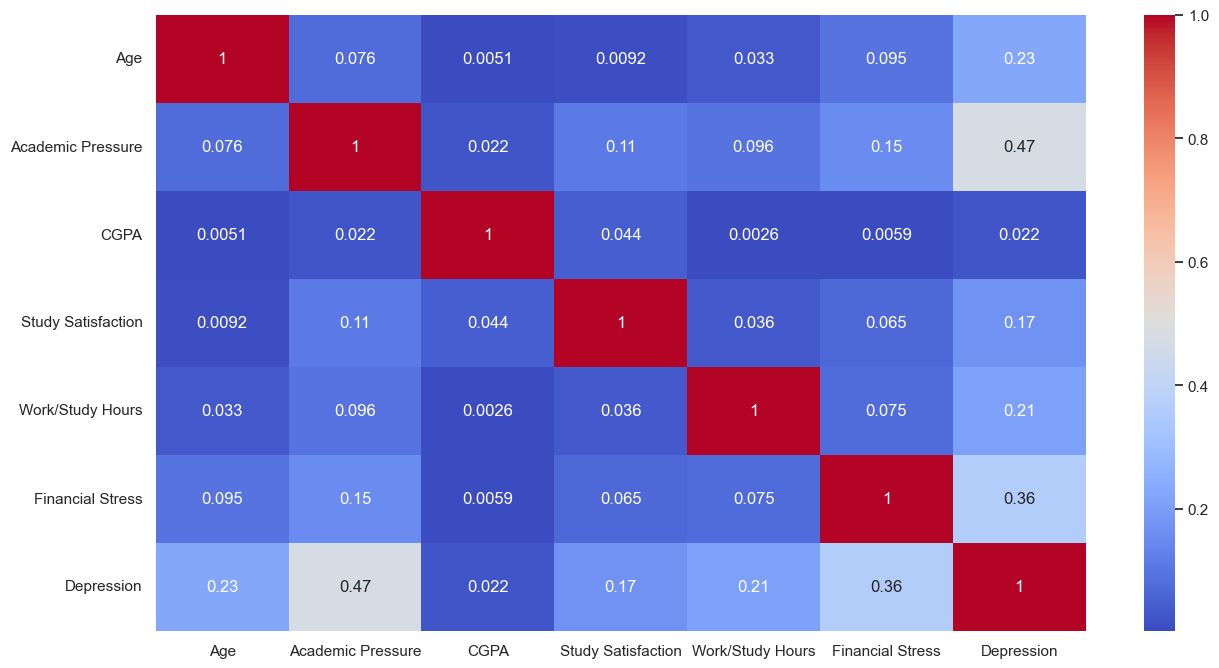

In [23]:
sns.heatmap(df.corr(numeric_only=True).abs(), annot=True, cmap='coolwarm')

### **Data Visualization**

#### ***Categorical Variables***

In [24]:
df.select_dtypes(include='object').columns

Index(['Gender', 'City', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Suicidal Thoughts', 'Family History of Mental Illness'],
      dtype='object')

In [25]:
df['Gender'].value_counts()

Gender
Male      15547
Female    12354
Name: count, dtype: int64

<Axes: title={'center': 'Gender'}, xlabel='Gender', ylabel='Frequency'>

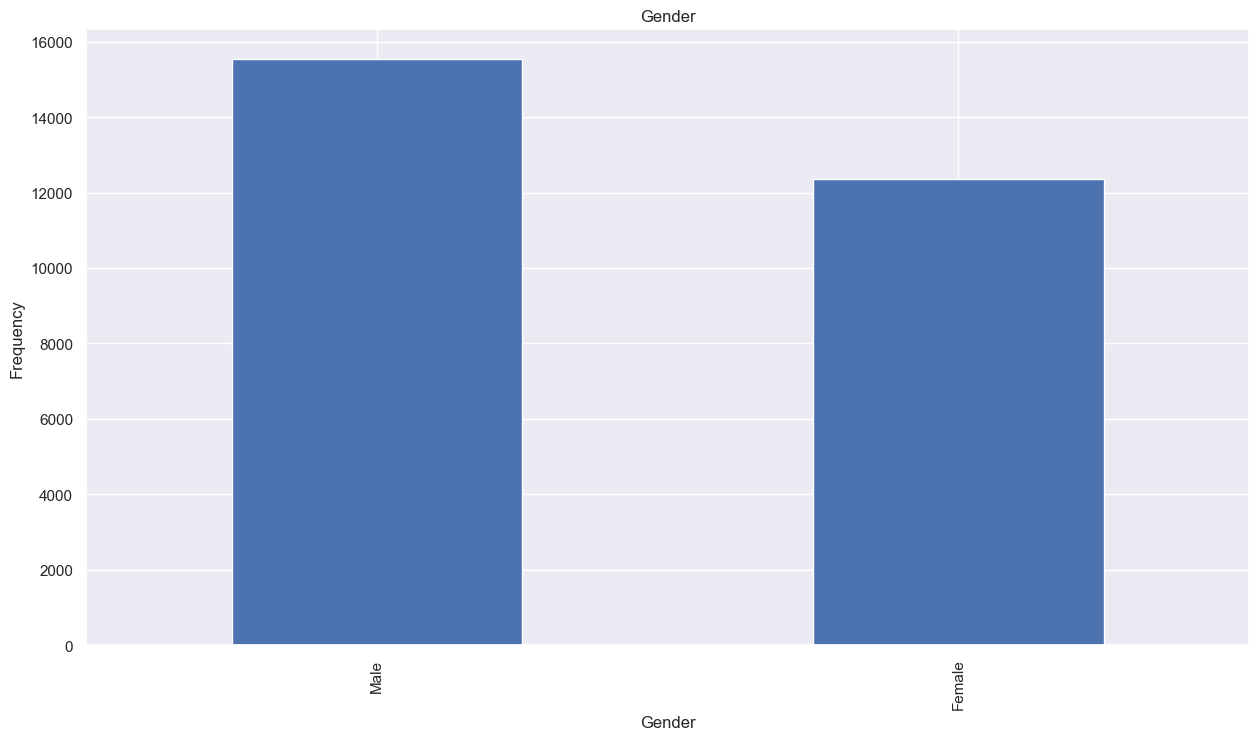

In [26]:
df['Gender'].value_counts().plot(kind= 'bar', ylabel= "Frequency", title= 'Gender')

In [27]:
df['City'].value_counts()

City
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
                        ... 
'Less than 5 Kalyan'       1
3.0                        1
'Less Delhi'               1
M.Tech                     1
Khaziabad                  1
Name: count, Length: 52, dtype: int64

<Axes: title={'center': 'City'}, xlabel='City', ylabel='Frequency'>

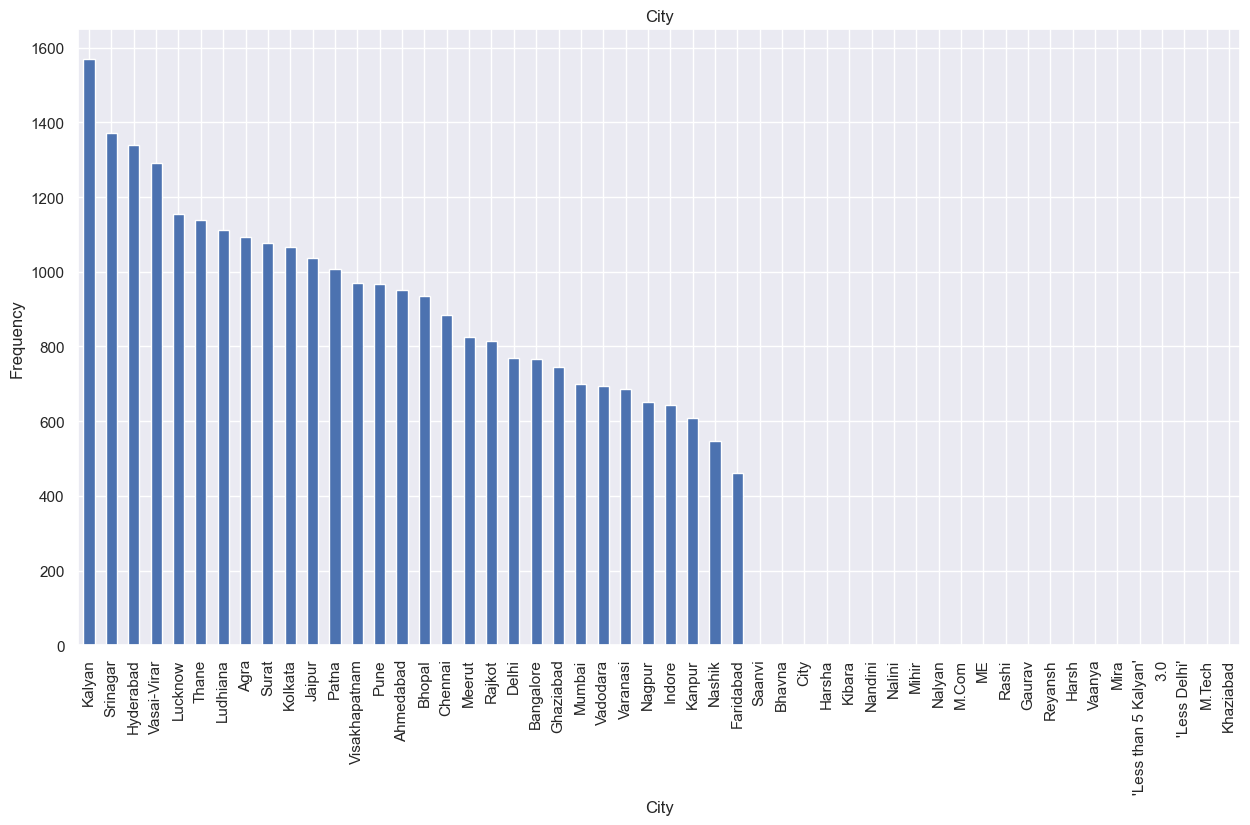

In [28]:
df['City'].value_counts().plot(kind= 'bar', ylabel= "Frequency", title= 'City')

In [29]:
df['Sleep Duration'].value_counts()

Sleep Duration
'Less than 5 hours'    8310
'7-8 hours'            7346
'5-6 hours'            6183
'More than 8 hours'    6044
Others                   18
Name: count, dtype: int64

<Axes: title={'center': 'Sleep Duration'}, xlabel='Sleep Duration', ylabel='Frequency'>

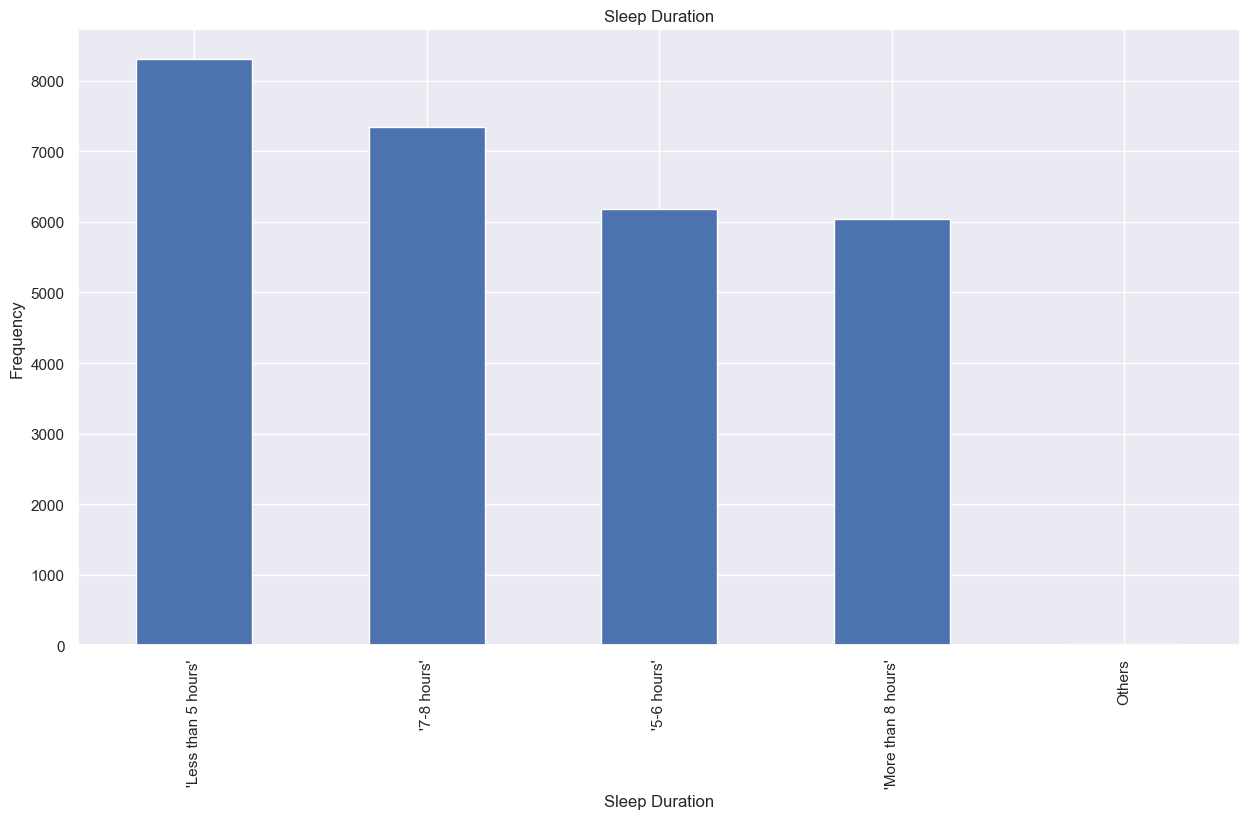

In [30]:
df['Sleep Duration'].value_counts().plot(kind= 'bar', ylabel= "Frequency", title= 'Sleep Duration')

In [31]:
df['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    10317
Moderate      9921
Healthy       7651
Others          12
Name: count, dtype: int64

<Axes: title={'center': 'Dietary Habits'}, xlabel='Dietary Habits', ylabel='Frequency'>

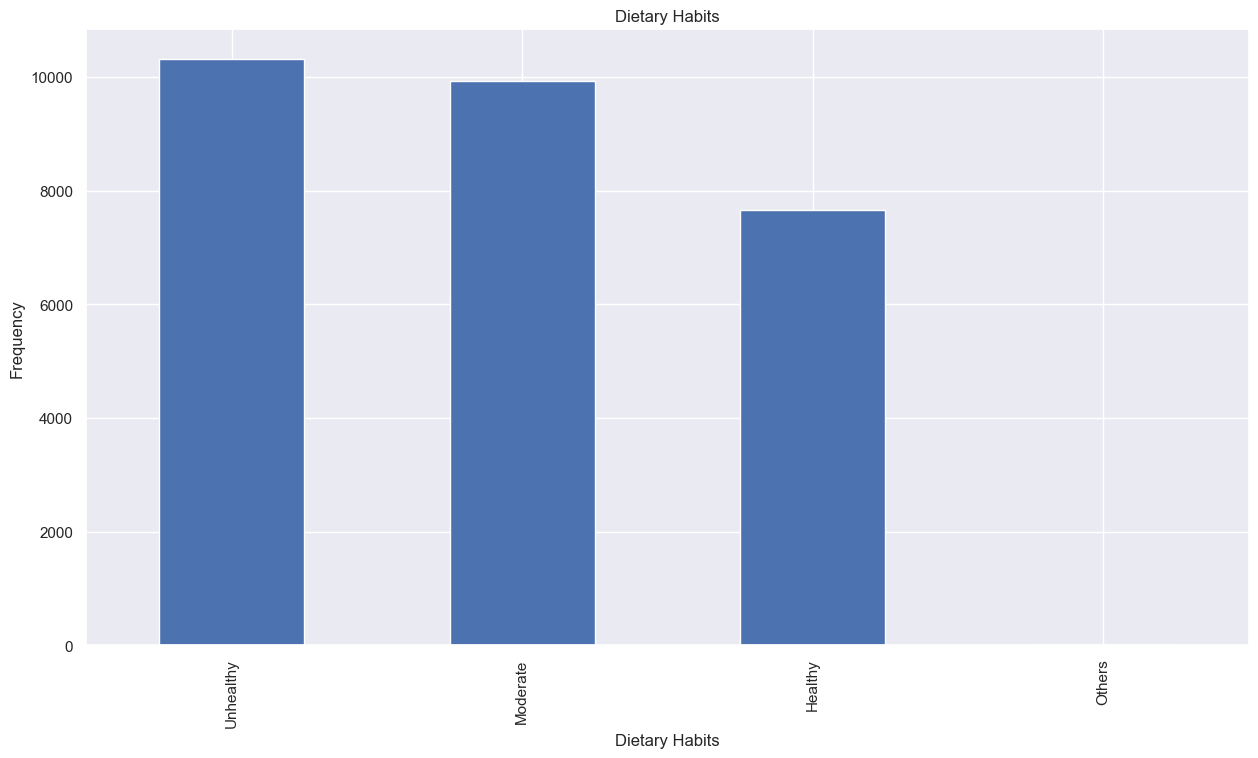

In [32]:
df['Dietary Habits'].value_counts().plot(kind= 'bar', ylabel= "Frequency", title= 'Dietary Habits')

In [33]:
df['Degree'].value_counts()

Degree
'Class 12'    6080
B.Ed          1867
B.Com         1506
B.Arch        1478
BCA           1433
MSc           1190
B.Tech        1152
MCA           1044
M.Tech        1022
BHM            925
BSc            888
M.Ed           821
B.Pharm        810
M.Com          734
MBBS           696
BBA            696
LLB            671
BE             613
BA             600
M.Pharm        582
MD             572
MBA            562
MA             544
PhD            522
LLM            482
MHM            191
ME             185
Others          35
Name: count, dtype: int64

<Axes: title={'center': 'Degree'}, xlabel='Degree', ylabel='Frequency'>

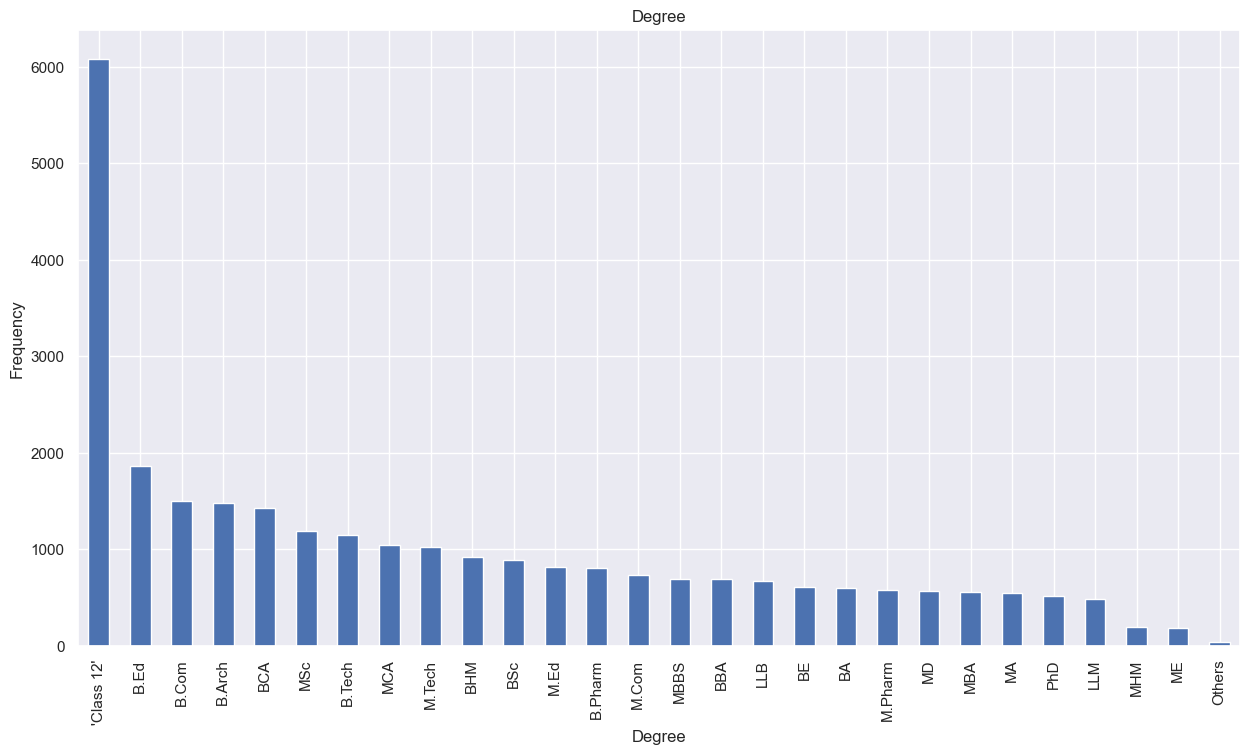

In [34]:
df['Degree'].value_counts().plot(kind= 'bar', ylabel= "Frequency", title= 'Degree')

In [35]:
df['Suicidal Thoughts'].value_counts()

Suicidal Thoughts
Yes    17656
No     10245
Name: count, dtype: int64

<Axes: title={'center': 'Suicidal Thoughts'}, xlabel='Suicidal Thoughts', ylabel='Frequency'>

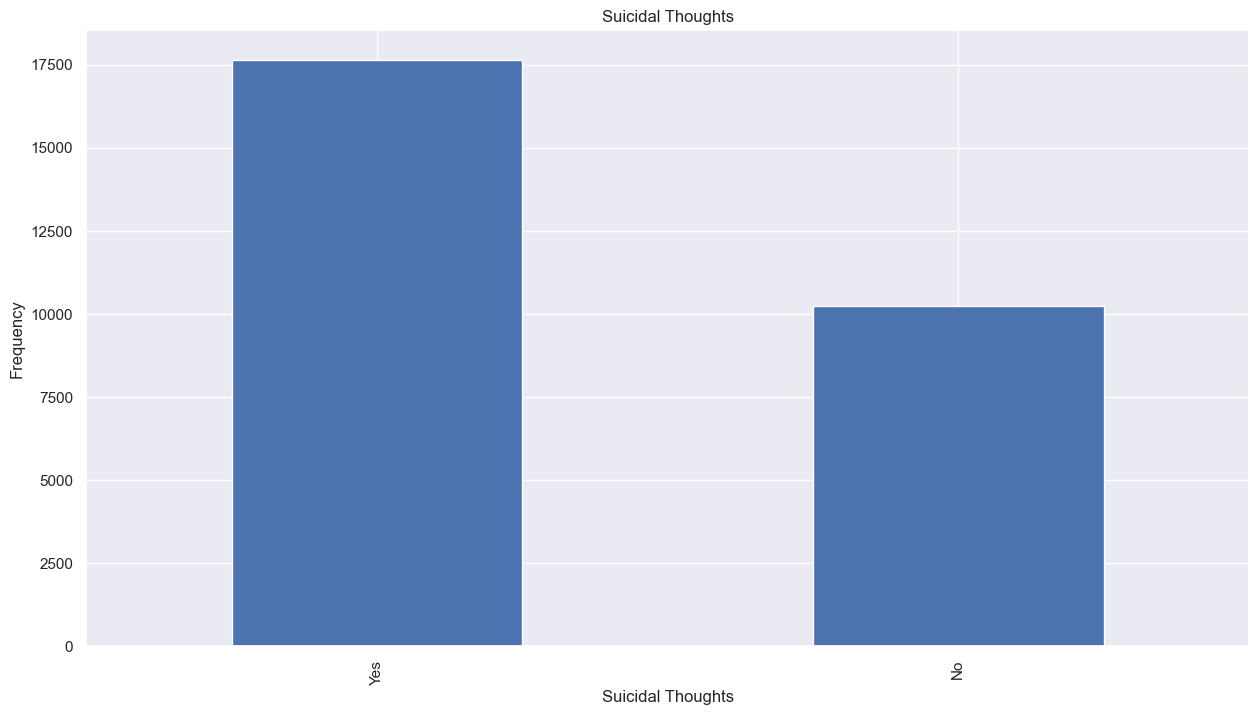

In [36]:
df['Suicidal Thoughts'].value_counts().plot(kind= 'bar', ylabel= "Frequency", title= 'Suicidal Thoughts')

In [37]:
df['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     14398
Yes    13503
Name: count, dtype: int64

<Axes: title={'center': 'Family History of Mental Illness'}, xlabel='Family History of Mental Illness', ylabel='Frequency'>

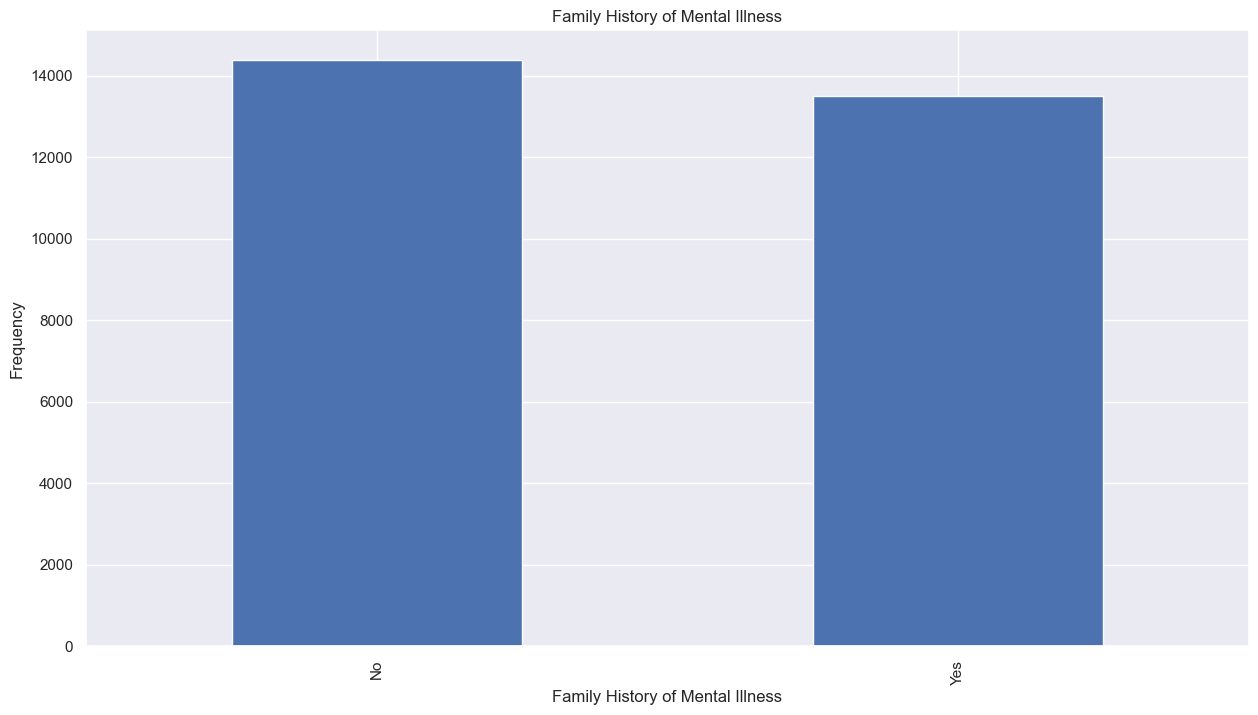

In [38]:
df['Family History of Mental Illness'].value_counts().plot(kind= 'bar', ylabel= "Frequency", title= 'Family History of Mental Illness')

#### ***Numerical Values***

In [39]:
df.select_dtypes(include='number').columns

Index(['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Work/Study Hours', 'Financial Stress', 'Depression'],
      dtype='object')

<Axes: ylabel='Frequency'>

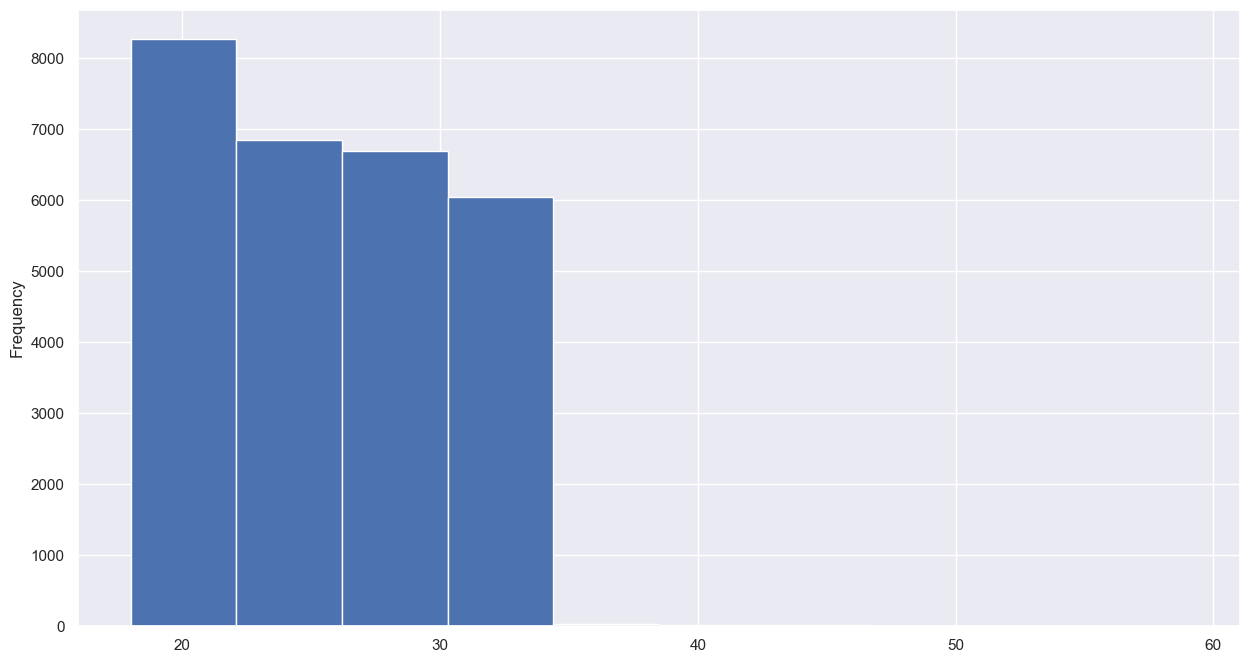

In [40]:
df['Age'].plot(kind='hist')

<Axes: >

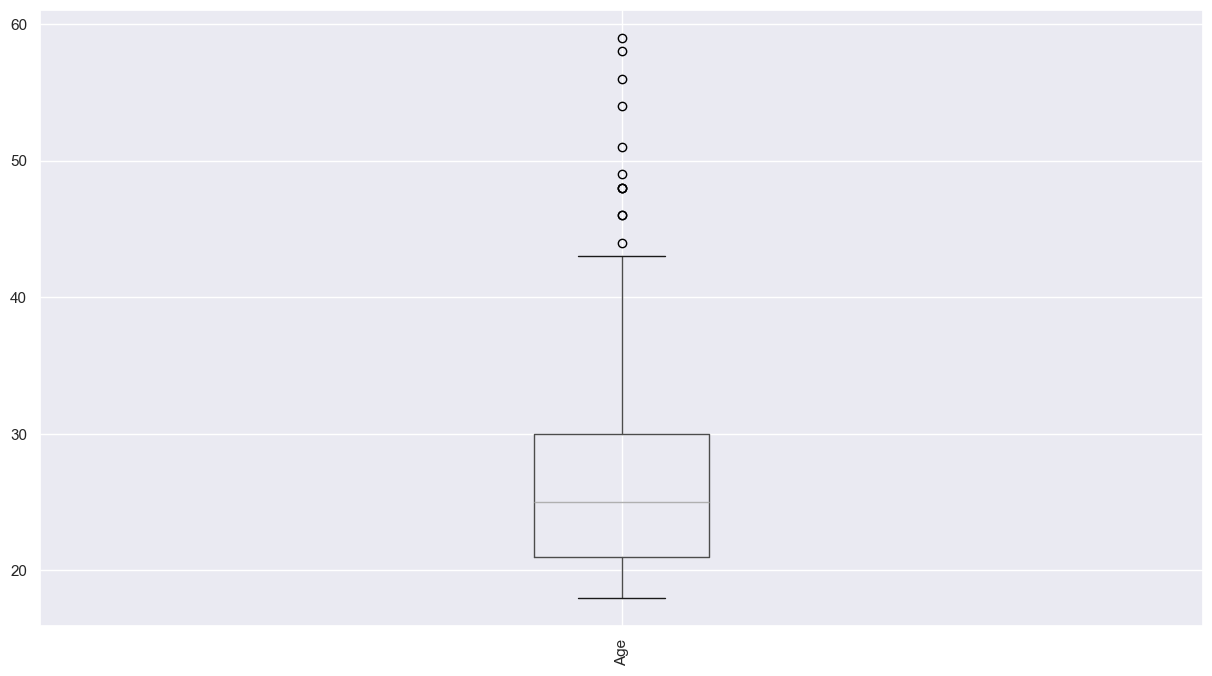

In [41]:
df.boxplot(column='Age', rot=90)

<Axes: ylabel='Frequency'>

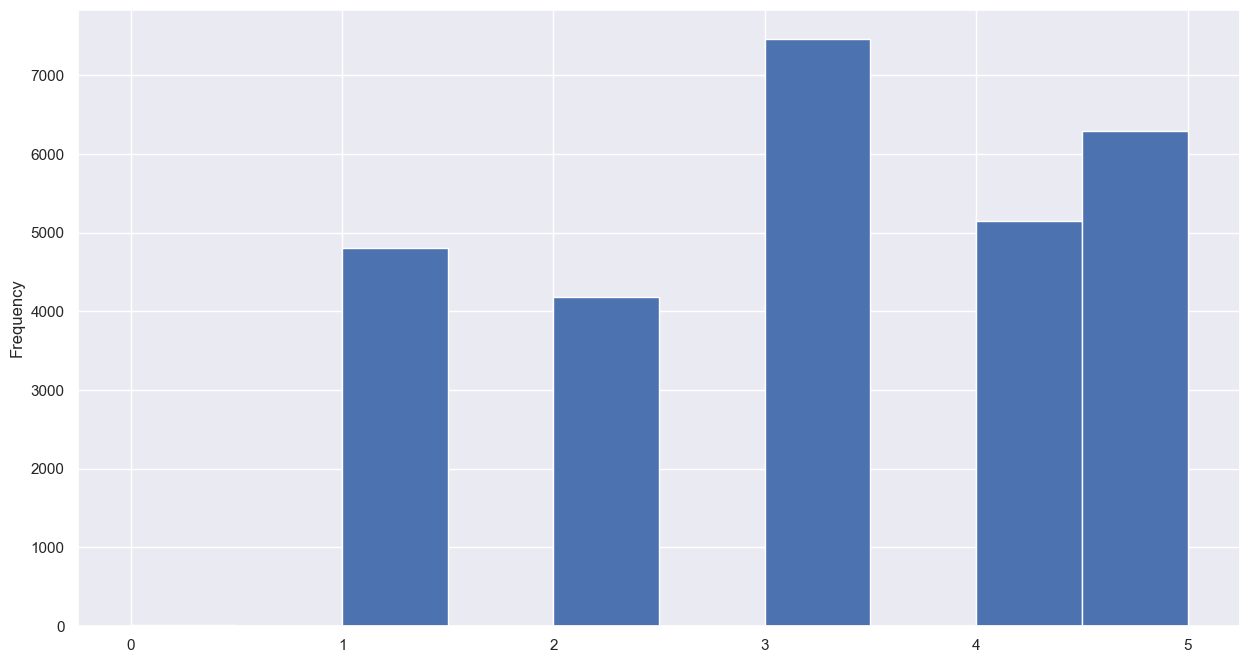

In [42]:
df['Academic Pressure'].plot(kind='hist')

<Axes: >

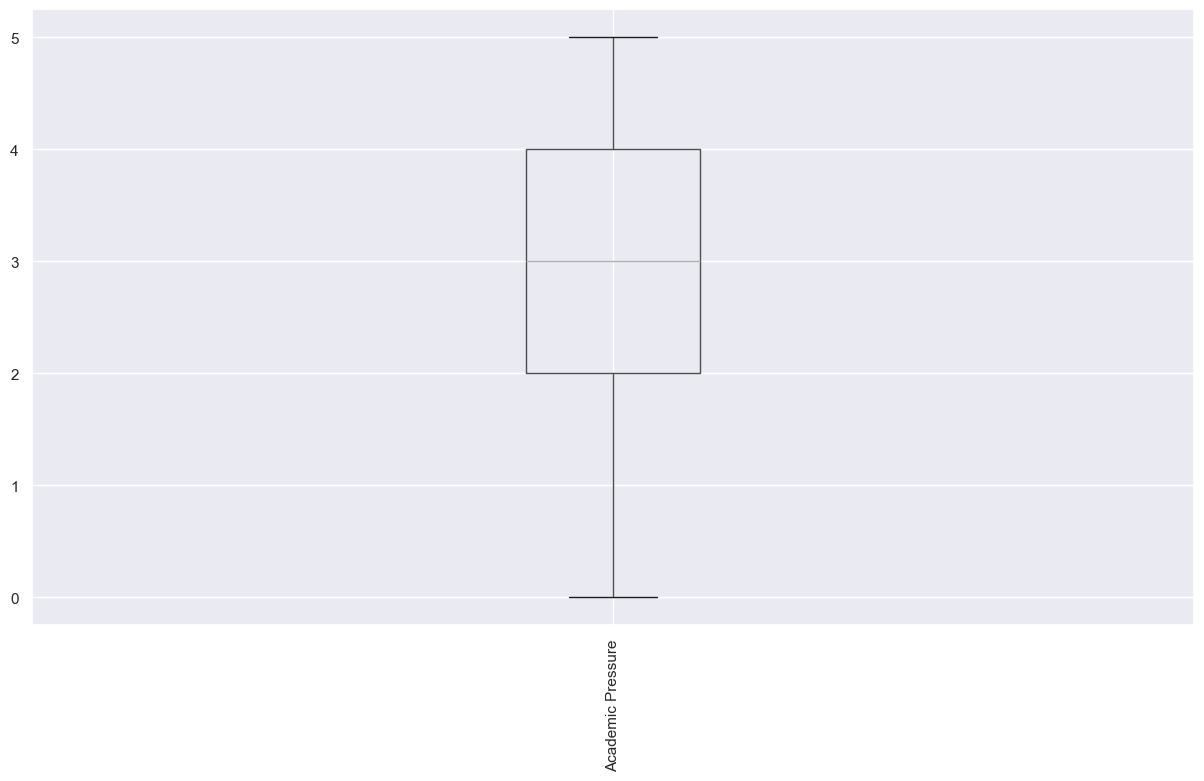

In [43]:
df.boxplot(column='Academic Pressure', rot=90)

<Axes: ylabel='Frequency'>

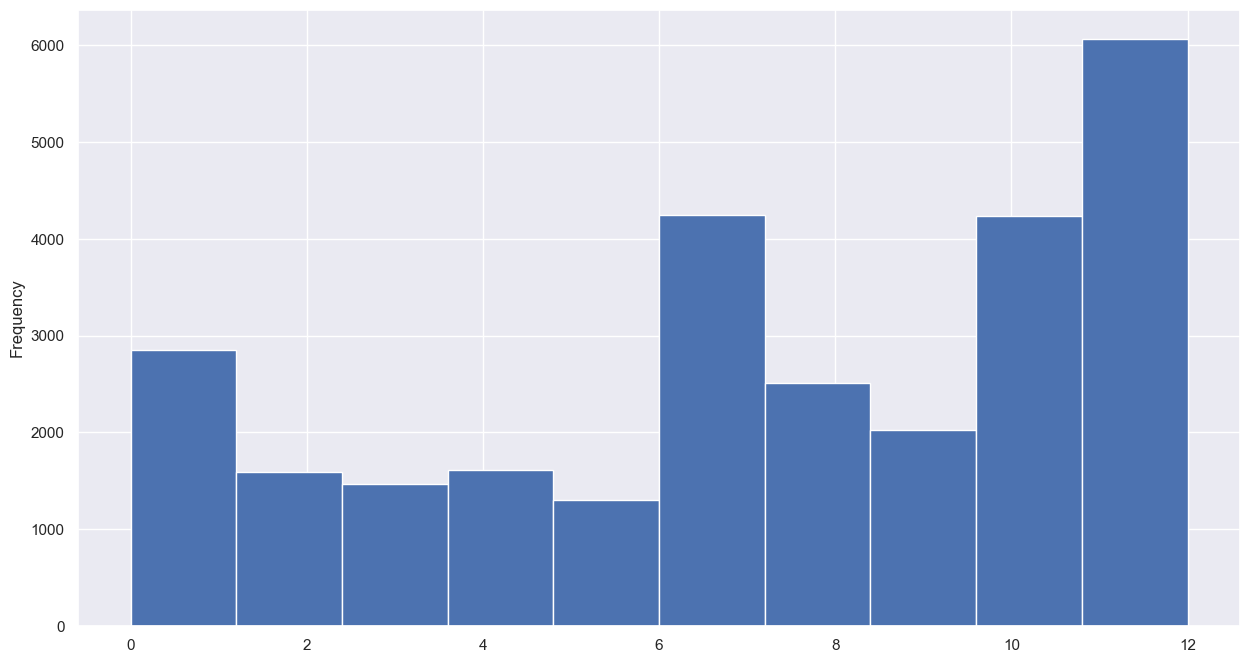

In [44]:
df['Work/Study Hours'].plot(kind='hist')

<Axes: >

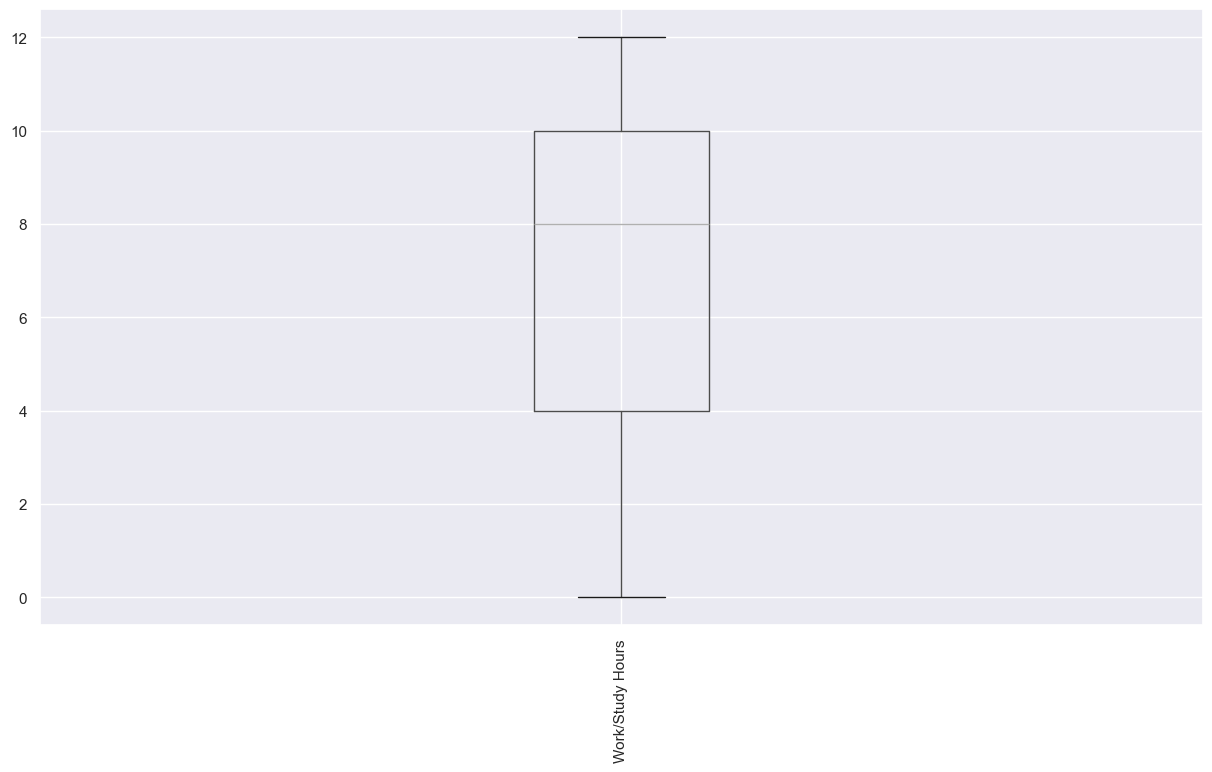

In [45]:
df.boxplot(column='Work/Study Hours', rot=90)

<Axes: ylabel='Frequency'>

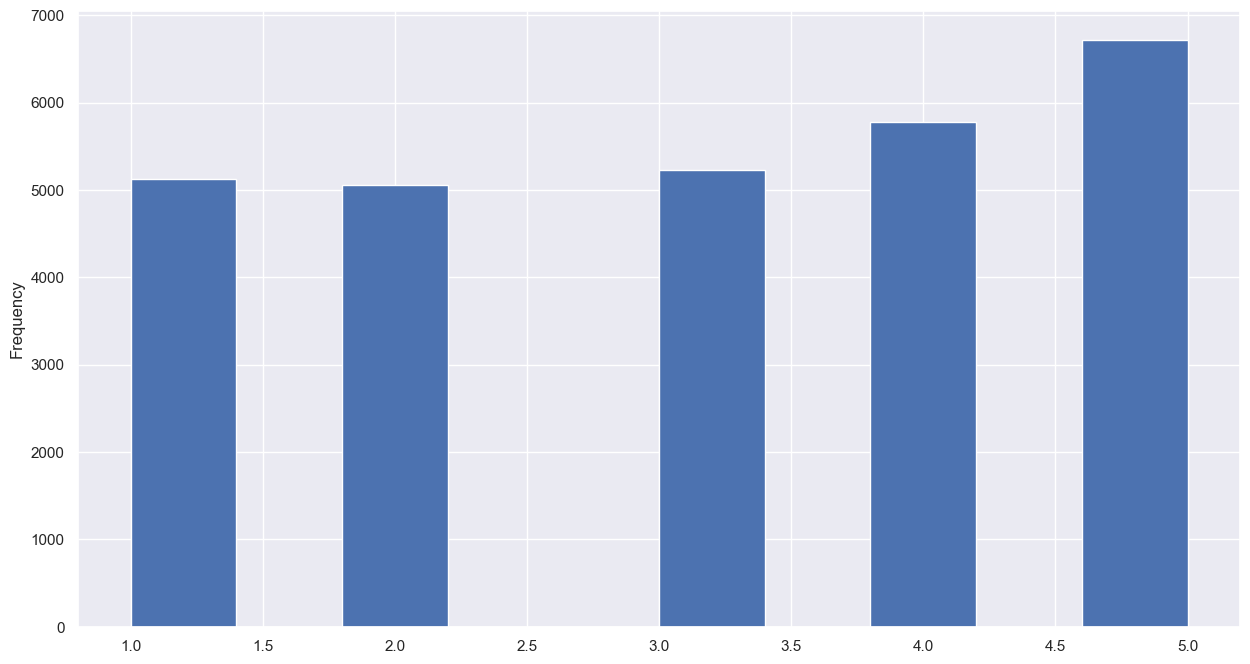

In [46]:
df['Financial Stress'].plot(kind='hist')

<Axes: >

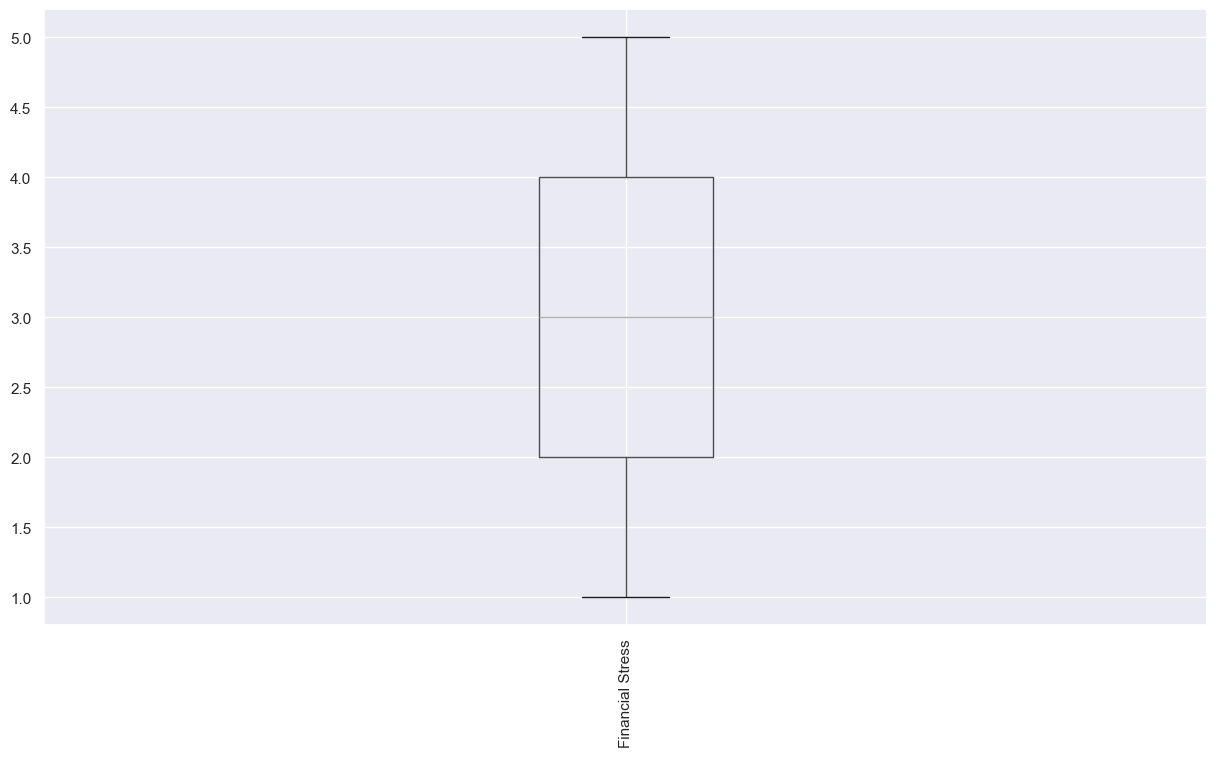

In [47]:
df.boxplot(column='Financial Stress', rot=90)

<Axes: ylabel='Frequency'>

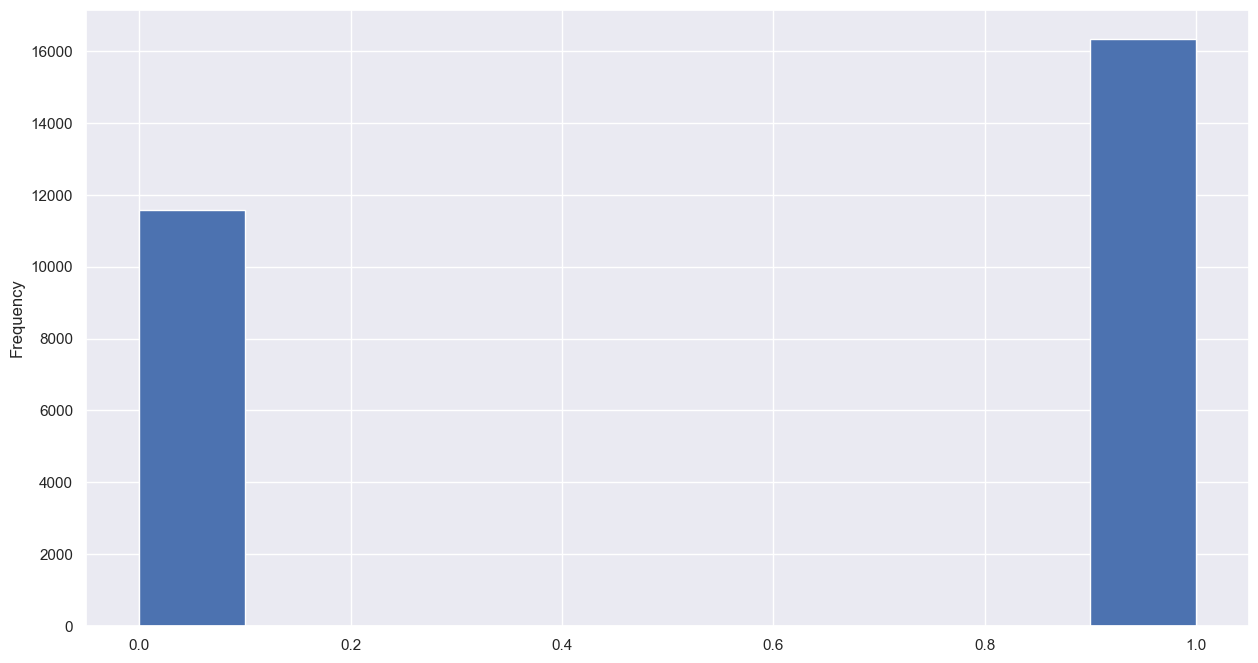

In [48]:
df['Depression'].plot(kind='hist')

<Axes: >

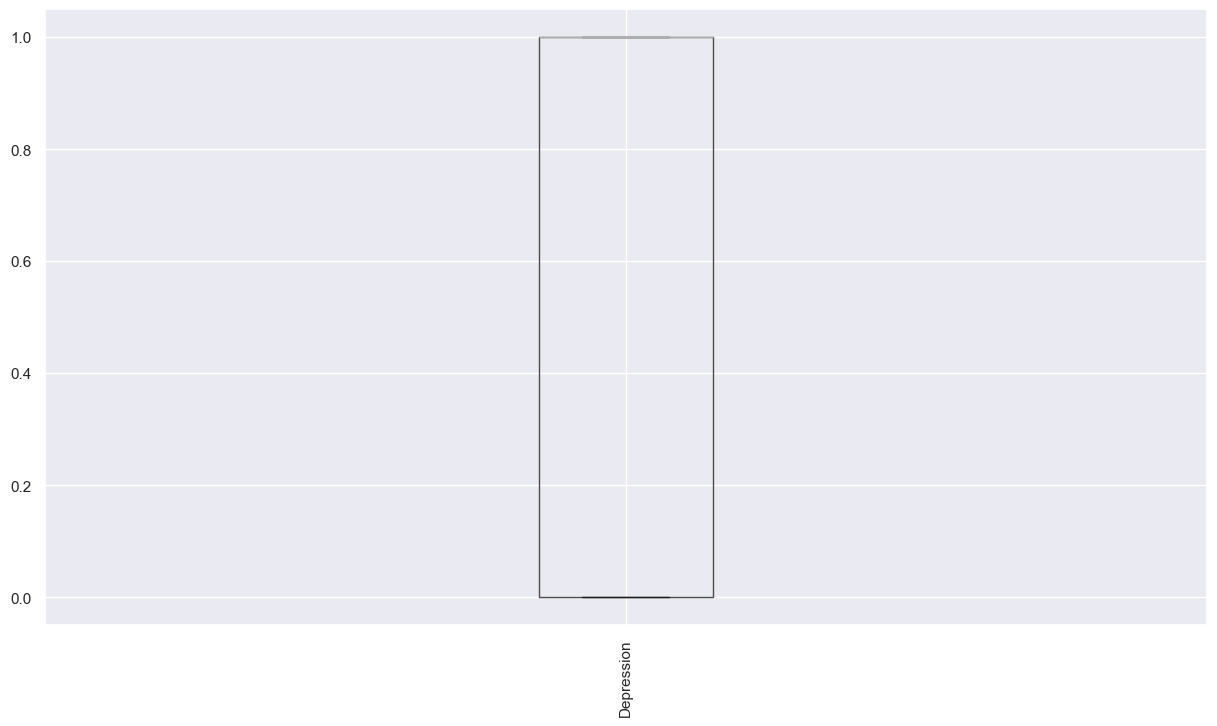

In [49]:
df.boxplot(column='Depression', rot=90)

## **Data Preprocesssing**

In [50]:
df.dtypes

Gender                               object
Age                                 float64
City                                 object
Academic Pressure                   float64
CGPA                                float64
Study Satisfaction                  float64
Sleep Duration                       object
Dietary Habits                       object
Degree                               object
Suicidal Thoughts                    object
Work/Study Hours                    float64
Financial Stress                    float64
Family History of Mental Illness     object
Depression                            int64
dtype: object

In [51]:
df.isna().sum()

Gender                              0
Age                                 0
City                                0
Academic Pressure                   0
CGPA                                0
Study Satisfaction                  0
Sleep Duration                      0
Dietary Habits                      0
Degree                              0
Suicidal Thoughts                   0
Work/Study Hours                    0
Financial Stress                    3
Family History of Mental Illness    0
Depression                          0
dtype: int64

#### **Replace Missing Categorical Values**

In [52]:
df.fillna(df.select_dtypes(include= 'number').mode().iloc[0], inplace= True)

In [53]:
##Verifiying
df.isna().sum()

Gender                              0
Age                                 0
City                                0
Academic Pressure                   0
CGPA                                0
Study Satisfaction                  0
Sleep Duration                      0
Dietary Habits                      0
Degree                              0
Suicidal Thoughts                   0
Work/Study Hours                    0
Financial Stress                    0
Family History of Mental Illness    0
Depression                          0
dtype: int64

#### ***One Hot Coding***

In [54]:
df.select_dtypes(include='object')

,Gender,City,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Family History of Mental Illness
0,Male,Visakhapatnam,'5-6 hours',Healthy,B.Pharm,Yes,No
1,Female,Bangalore,'5-6 hours',Moderate,BSc,No,Yes
2,Male,Srinagar,'Less than 5 hours',Healthy,BA,No,Yes
3,Female,Varanasi,'7-8 hours',Moderate,BCA,Yes,Yes
4,Female,Jaipur,'5-6 hours',Moderate,M.Tech,Yes,No
...,...,...,...,...,...,...,...
27896,Female,Surat,'5-6 hours',Unhealthy,'Class 12',Yes,Yes
27897,Male,Ludhiana,'Less than 5 hours',Healthy,MSc,No,Yes
27898,Male,Faridabad,'5-6 hours',Unhealthy,MD,No,No
27899,Female,Ludhiana,'Less than 5 hours',Healthy,'Class 12',Yes,No


In [55]:
cols = ['Gender', 'Suicidal Thoughts', 'Family History of Mental Illness']

In [56]:
df = pd.get_dummies(df, columns= cols, drop_first= True)

#### ***Label Encoding***

In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['City_encoded'] = le.fit_transform(df['City'])
df['Degree_encoded'] = le.fit_transform(df['Degree'])
df['Sleep Duration_encoded'] = le.fit_transform(df['Sleep Duration'])
df['Dietary Habits_encoded'] = le.fit_transform(df['Dietary Habits'])

df.drop(['City', 'Degree', 'Sleep Duration', 'Dietary Habits'], axis=1, inplace=True)

In [58]:
df

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression,Gender_Male,Suicidal Thoughts_Yes,Family History of Mental Illness_Yes,City_encoded,Degree_encoded,Sleep Duration_encoded,Dietary Habits_encoded
0,33.0,5.0,8.97,2.0,3.0,1.0,1,True,True,False,51,4,0,0
1,24.0,2.0,5.90,5.0,3.0,2.0,0,False,False,True,5,11,0,1
2,31.0,3.0,7.03,5.0,9.0,1.0,0,True,False,True,44,6,2,0
3,28.0,3.0,5.59,2.0,4.0,5.0,1,False,True,True,49,8,1,1
4,25.0,4.0,8.13,3.0,1.0,1.0,0,False,True,False,18,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,27.0,5.0,5.75,5.0,7.0,1.0,0,False,True,True,45,0,0,3
27897,27.0,2.0,9.40,3.0,0.0,3.0,0,True,False,True,25,25,2,0
27898,31.0,3.0,6.61,4.0,12.0,2.0,0,True,False,False,11,22,0,3
27899,18.0,5.0,6.88,2.0,10.0,5.0,1,False,True,False,25,0,2,0


#### **Shuffle the Data**

In [59]:
from sklearn.utils import shuffle

In [60]:
df = shuffle(df)

In [61]:
df

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression,Gender_Male,Suicidal Thoughts_Yes,Family History of Mental Illness_Yes,City_encoded,Degree_encoded,Sleep Duration_encoded,Dietary Habits_encoded
8657,34.0,5.0,6.02,1.0,2.0,4.0,0,True,False,False,5,11,1,3
18263,28.0,5.0,5.32,4.0,12.0,3.0,1,False,True,False,10,9,3,1
21790,26.0,3.0,8.79,4.0,7.0,3.0,0,True,True,False,7,22,1,1
3222,20.0,3.0,5.27,3.0,2.0,5.0,1,False,True,True,19,0,0,3
8551,31.0,5.0,7.78,4.0,12.0,5.0,1,True,True,False,10,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26272,21.0,3.0,8.91,4.0,7.0,5.0,1,False,True,True,16,1,3,1
27213,19.0,2.0,7.10,5.0,9.0,3.0,1,False,True,True,10,0,1,0
8114,28.0,4.0,9.96,2.0,12.0,3.0,1,True,True,False,46,4,0,3
24447,30.0,3.0,5.57,5.0,6.0,1.0,0,False,False,False,50,10,1,3


#### **Split X and y**

In [62]:
X = df.drop(['Depression'], axis=1)
X

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Gender_Male,Suicidal Thoughts_Yes,Family History of Mental Illness_Yes,City_encoded,Degree_encoded,Sleep Duration_encoded,Dietary Habits_encoded
8657,34.0,5.0,6.02,1.0,2.0,4.0,True,False,False,5,11,1,3
18263,28.0,5.0,5.32,4.0,12.0,3.0,False,True,False,10,9,3,1
21790,26.0,3.0,8.79,4.0,7.0,3.0,True,True,False,7,22,1,1
3222,20.0,3.0,5.27,3.0,2.0,5.0,False,True,True,19,0,0,3
8551,31.0,5.0,7.78,4.0,12.0,5.0,True,True,False,10,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26272,21.0,3.0,8.91,4.0,7.0,5.0,False,True,True,16,1,3,1
27213,19.0,2.0,7.10,5.0,9.0,3.0,False,True,True,10,0,1,0
8114,28.0,4.0,9.96,2.0,12.0,3.0,True,True,False,46,4,0,3
24447,30.0,3.0,5.57,5.0,6.0,1.0,False,False,False,50,10,1,3


In [63]:
y = df['Depression']
y

8657     0
18263    1
21790    0
3222     1
8551     1
        ..
26272    1
27213    1
8114     1
24447    0
10577    1
Name: Depression, Length: 27901, dtype: int64

### **Balance Dataset**

In [64]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler


In [65]:
print(Counter(y))

Counter({1: 16336, 0: 11565})


In [66]:
oversample = RandomOverSampler(sampling_strategy= 'minority')

In [67]:
X, y = oversample.fit_resample(X,y)

In [68]:
print(Counter(y))

Counter({0: 16336, 1: 16336})


### **Data Normalization**

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler_m= MinMaxScaler()

In [70]:
X = scaler_m.fit_transform(X.values)

In [71]:
X.shape

(32672, 13)

In [72]:
X

array([[0.3902439 , 1.        , 0.602     , ..., 0.40740741, 0.25      ,
        1.        ],
       [0.24390244, 1.        , 0.532     , ..., 0.33333333, 0.75      ,
        0.33333333],
       [0.19512195, 0.6       , 0.879     , ..., 0.81481481, 0.25      ,
        0.33333333],
       ...,
       [0.17073171, 0.4       , 0.681     , ..., 0.51851852, 0.75      ,
        0.33333333],
       [0.02439024, 0.2       , 0.911     , ..., 0.        , 0.75      ,
        0.        ],
       [0.3902439 , 0.2       , 0.966     , ..., 0.77777778, 0.5       ,
        0.33333333]])

#### **Train, Test Split**

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [74]:
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [75]:
model.score(X_test, y_test)

0.8121811875127525

In [76]:
y_pred = model.predict(X_test)

## **Modeling**

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [78]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

[[4037  806]
 [1035 3924]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      4843
           1       0.83      0.79      0.81      4959

    accuracy                           0.81      9802
   macro avg       0.81      0.81      0.81      9802
weighted avg       0.81      0.81      0.81      9802

AUC Score: 0.812431398545921


## **Evaluation**

In [79]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4037,  806],
       [1035, 3924]])

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      4843
           1       0.83      0.79      0.81      4959

    accuracy                           0.81      9802
   macro avg       0.81      0.81      0.81      9802
weighted avg       0.81      0.81      0.81      9802



Text(92.25, 0.5, 'Truth')

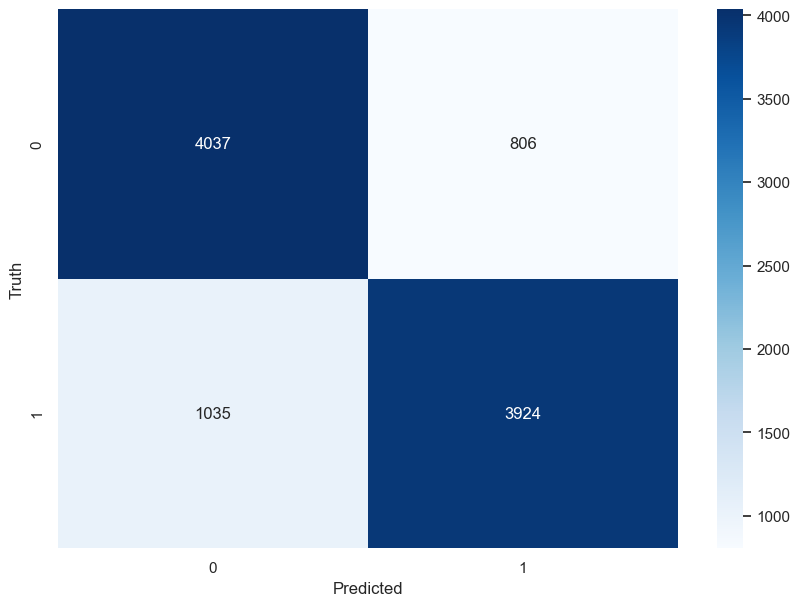

In [81]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot= True, fmt= 'g', cmap= 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### **ROC/AUC Curve**

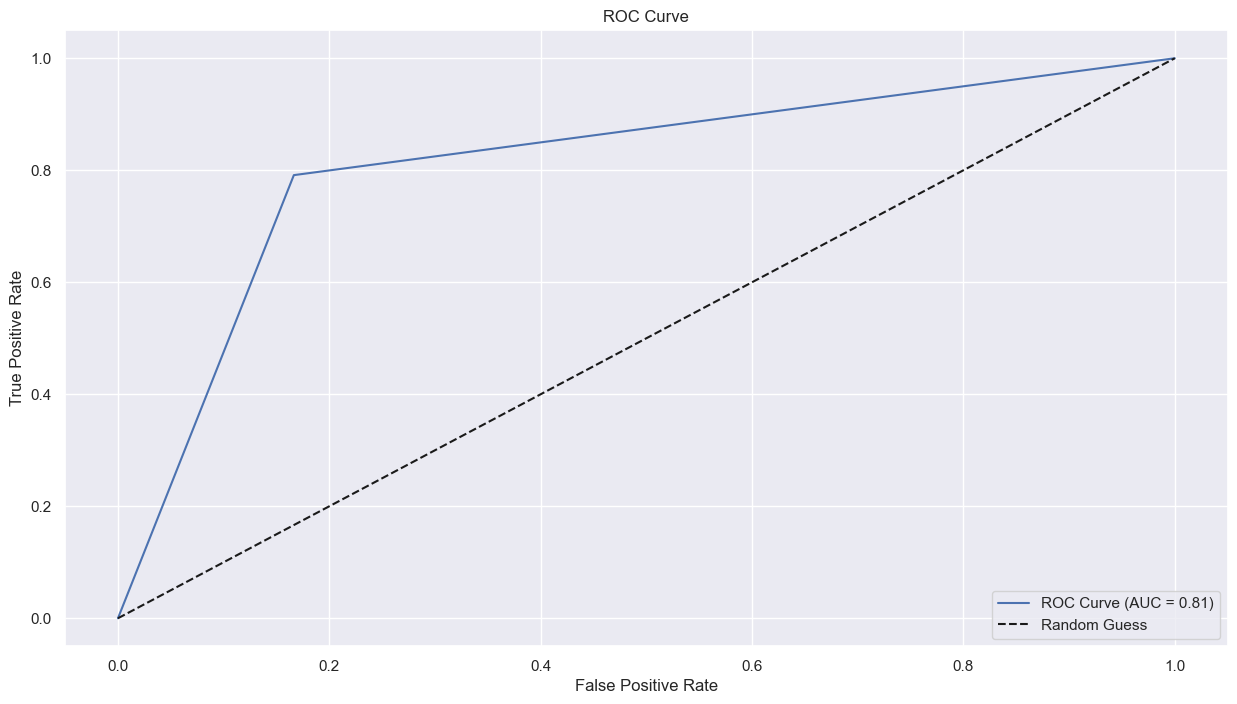

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_score = roc_auc_score(y_test, y_probs)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### **Feature Importance**

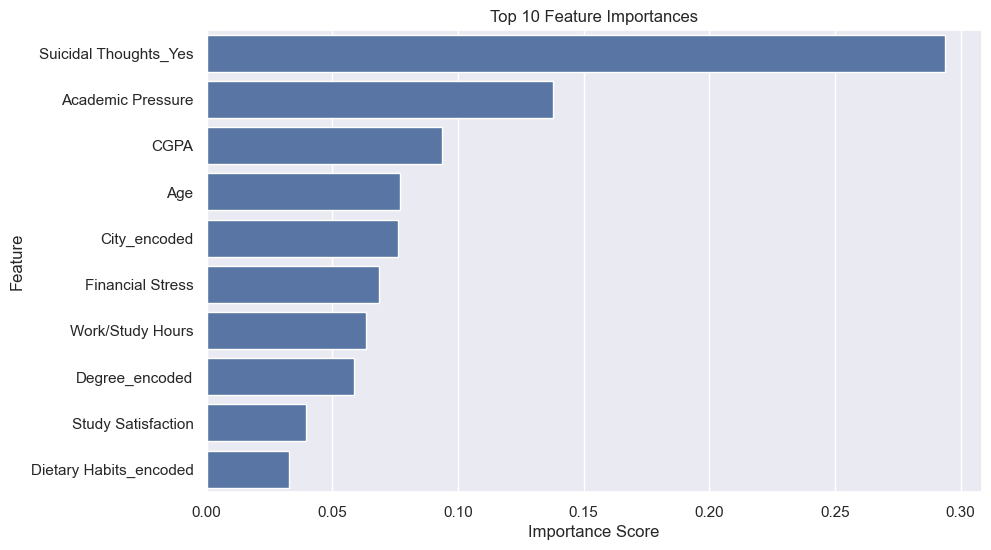

In [92]:
import pandas as pd
import seaborn as sns

feat_importances = pd.Series(
    model.feature_importances_,
    index=df.drop('Depression', axis=1).columns
)

# Plot top 10 features
plt.figure(figsize=(10,6))
sns.barplot(
    x=feat_importances.nlargest(10).values,
    y=feat_importances.nlargest(10).index
)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

Suicidal thoughts seems to have the highest influence in predicting depression in students